# Lecture 22: 
- K-Nearest Neighbor Classification (KNN)
- K-Means Clustering

__Optional Reading Material:__
- [Scikit-learn: Nearest Neighbors Classification](http://scikit-learn.org/stable/modules/neighbors.html)
- [K-nearest Neighbors Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Scikit-learn: K-Means Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Visualizing K-Means clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

`conda install -c anaconda scikit-learn=1.0.2`

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

### k-Nearest Neighbor Classification (KNN)
KNN is a simple way of classifying data based on a set of training data: data with known classifications. Each observation point is classified based on the closest observation points in the training set. This gives us several parameters to play with: the number of closest neighbors taken into account (this is the k), the way we measure distance (what does “nearest” mean?), and the way we choose the class based on the classes of the closest neighbors (simple majority, or do closer neighbors carry more weight?). Some possible distance measures are:

### k-最近邻分类（KNN）
KNN 是一种基于一组训练数据对数据进行分类的简单方法：具有已知分类的数据。 每个观察点根据训练集中最近的观察点进行分类。 这为我们提供了几个参数：考虑的最近邻居的数量（这是 k），我们测量距离的方式（“最近”是什么意思？），以及我们根据类别选择类别的方式 最近邻居的（简单多数，还是更近的邻居更重要？）。 一些可能的距离度量是：

- Minkowski distance:
$$
d(x,y) = \displaystyle\sqrt[q]{\sum_i\vert x[i]-y[i]\vert^q}
$$
- Euclidean: Minkowski with q = 2. (Default in sklearn)
- Manhattan: Minkowski with q = 1.
- Hamming: number of indices in which the vectors are different. This is often used for binary
data (in which case it is the same as Manhattan).

- 闵可夫斯基距离：
$$
d(x,y) = \displaystyle\sqrt[q]{\sum_i\vert x[i]-y[i]\vert^q}
$$
- 欧几里德：闵可夫斯基，q = 2。（sklearn 中的默认值）
- 曼哈顿：闵可夫斯基，q = 1。
- Hamming：向量不同的索引数。 这通常用于二进制
数据（在这种情况下它与曼哈顿相同）。

Examples of weighting schemes are:
- Uniform: all points in the set of k closest neighbors are weighted equally. (Default in sklearn)
- Distance: Points are weighted by 1/distance.
- User defined: Any user-defined weighting scheme can be input as a function that turns an array of distances into an array of weights.

We use the model as follows. Suppose that we have a training set __X__, with a set of known labels __Y__. Then we use those to initialize the model. (In this case, we set k = 1.)

加权方案的例子是：
- 统一：k 个最近邻集合中的所有点均等加权。 （sklearn 中的默认值）
- 距离：点按 1/距离加权。
- 用户定义：任何用户定义的加权方案都可以作为将距离数组转换为权重数组的函数输入。

我们使用模型如下。 假设我们有一个训练集 __X__，带有一组已知标签 __Y__。 然后我们使用它们来初始化模型。 （在这种情况下，我们设置 k = 1。）

In [2]:
import numpy as np
from sklearn import neighbors 
X = np.array([[1,1,3,4],
             [1,1,3,5],
             [2,1,5,5],
             [5,5,1,2],
             [5,4,1,3],
             [5,5,1,1]])
Y = np.array([1,1,2,3,4,5])
nbrs = neighbors.KNeighborsClassifier(2)
nbrs.fit(X, Y)

KNeighborsClassifier(n_neighbors=2)

Now, suppose we would like to classify the following testing set __T__, we do that as follows:

现在，假设我们想对以下测试集 __T__ 进行分类，我们按如下方式进行：

In [3]:
T = np.array([[1,2,3,1],
             [5,3,2,1]])
nbrs.predict(T)

/opt/anaconda3/envs/16A/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 3])

In [4]:
# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.
from math import sqrt
def dist(a, b):
    return sqrt(sum([(a[i] - b[i])**2 for i in range(len(b))]))

def simpleKNN(x, y, datas):
    allDist = []
    for i in range(len(datas)):
        allDist.append([])
        for j in range(len(x)):
            currDist = dist(x[j], datas[i])
            allDist[i].append((currDist, x[j], y[j]))
    return allDist
            

X = [[1,1,3,4],
             [1,1,3,5],
             [2,1,5,5],
             [5,5,1,2],
             [5,4,1,3],
             [5,5,1,1]]

Y = [1,1,2,3,4,5]

T = [[1,2,3,1],
             [5,3,2,1],
             [2,1,5,5]]

print(tuple(zip(X, Y)))
print(simpleKNN(X, Y, T))
output = simpleKNN(X, Y, T)
for i in range(len(T)):
    output[i] = sorted(output[i], key=lambda x: x[0])
    print(f'min from point \t\t{T[i]} ')
    print(f'First: \t\t{output[i][0]}')
    print(f'Second: \t\t{output[i][1]}')
    print(f'Third: \t\t{output[i][2]}')
    print(f'Fourth: \t\t{output[i][3]}')

(([1, 1, 3, 4], 1), ([1, 1, 3, 5], 1), ([2, 1, 5, 5], 2), ([5, 5, 1, 2], 3), ([5, 4, 1, 3], 4), ([5, 5, 1, 1], 5))
[[(3.1622776601683795, [1, 1, 3, 4], 1), (4.123105625617661, [1, 1, 3, 5], 1), (4.69041575982343, [2, 1, 5, 5], 2), (5.477225575051661, [5, 5, 1, 2], 3), (5.291502622129181, [5, 4, 1, 3], 4), (5.385164807134504, [5, 5, 1, 1], 5)], [(5.477225575051661, [1, 1, 3, 4], 1), (6.082762530298219, [1, 1, 3, 5], 1), (6.164414002968976, [2, 1, 5, 5], 2), (2.449489742783178, [5, 5, 1, 2], 3), (2.449489742783178, [5, 4, 1, 3], 4), (2.23606797749979, [5, 5, 1, 1], 5)], [(2.449489742783178, [1, 1, 3, 4], 1), (2.23606797749979, [1, 1, 3, 5], 1), (0.0, [2, 1, 5, 5], 2), (7.0710678118654755, [5, 5, 1, 2], 3), (6.164414002968976, [5, 4, 1, 3], 4), (7.54983443527075, [5, 5, 1, 1], 5)]]
min from point 		[1, 2, 3, 1] 
First: 		(3.1622776601683795, [1, 1, 3, 4], 1)
Second: 		(4.123105625617661, [1, 1, 3, 5], 1)
Third: 		(4.69041575982343, [2, 1, 5, 5], 2)
Fourth: 		(5.291502622129181, [5, 4, 1, 

Here's another example with two-dimensional X:<br>
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

/opt/anaconda3/envs/16A/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


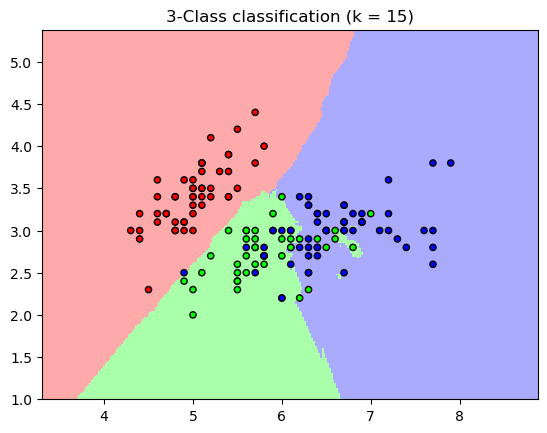

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)  # Z is prediction which determine the color.

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,  
            edgecolor='k', s=20)    # c=y means color determined by the y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))
plt.show()

### k-Means Clustering
The idea of k-means clustering is to group a set of data points into $k$ clusters (not to be confused with the k in the previous technique), such that we make the clusters as clustered, or as concentrated, as possible. So, if we wish to cluster into clusters $\{C_0, C_1, . . . C_{k−1}\}$, then we wish to minimize the total within-cluster variation:
$$
\displaystyle\sum_{i=0}^{k-1}\sum_{x\in C_i} d(x,\mu_i)^2.
$$

### k-均值聚类
k 均值聚类的思想是将一组数据点分组到 $k$ 个簇中（不要与前面技术中的 k 混淆），这样我们就可以使聚类尽可能聚集或集中。 因此，如果我们希望聚类成簇 $\{C_0, C_1, . . . C_{k−1}\}$，那么我们希望最小化簇内总变异：
$$
\displaystyle\sum_{i=0}^{k-1}\sum_{x\in C_i} d(x,\mu_i)^2。
$$

Note that when we were classifying we did not take such things into account. The goal then was not to create cohesive sets, and the data points were classified independently of one another. 

When clustering, the points are clustered very much dependently on each other. Usually, the distance function is the Euclidean distance (as before). It is not usually feasible to search the space of all possible solutions, so some fast optimization algorithm is used (sometimes several times). In sklearn, you as a user can control what method is used. k-Means clustering is faster and more robust if the data is as low-dimensional as possible. This means that linearly correlated variables should be combined. This is called __dimensionality reduction__.

__k-Means clustering__ is implemented as follows:

请注意，当我们进行分类时，我们没有考虑这些因素。 当时的目标不是创建内聚集，数据点彼此独立分类。

聚类时，点之间的聚类非常依赖于彼此。 通常，距离函数是欧氏距离（和以前一样）。 搜索所有可能解决方案的空间通常是不可行的，因此使用一些快速优化算法（有时多次）。 在 sklearn 中，你作为用户可以控制使用什么方法。 如果数据尽可能低维，则 k-Means 聚类会更快、更稳健。 这意味着应该组合线性相关的变量。 这称为 __dimensionality reduction__。

__k-Means聚类__ 实现如下：

In [28]:
from sklearn.cluster import KMeans
X=  np.array([[1,1,3,4],
              [2,1,5,5],
              [5,5,1,2],
              [5,4,1,3],
              [5,5,1,1]])
kmeans = KMeans(2)
kmeans.fit(X)
kmeans.labels_  

array([1, 1, 0, 0, 0], dtype=int32)

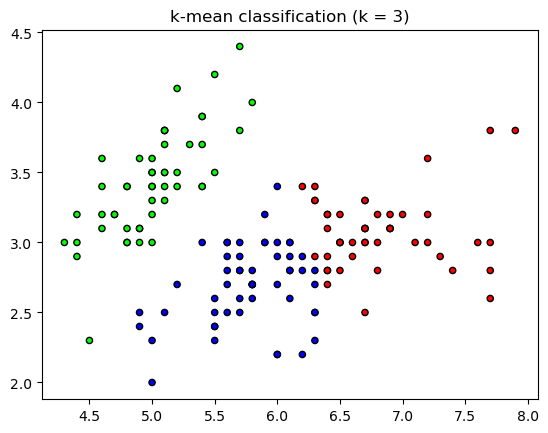

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
kmeans = KMeans(3)
kmeans.fit(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=cmap_bold,  
            edgecolor='k', s=20)    

plt.title("k-mean classification (k = 3)")
plt.show()

Again, if you look at the data, these are likely the clusters that you would have detected intuitively.

Here's a more complicated example:

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

### Exercise:

Download the dataset "Classification of 244 Marble Samples from 6 Groups" from http://stat.ufl.edu/~winner/datasets.html (or any other datasets that you are interested in). Apply KNN classfication and K-means clustering to the dataset. 